# **Degree Distribution**

In [6]:

!pip install py7zr  # Install the py7zr library for extracting .7z files

import os
import random
import networkx as nx
from py7zr import unpack_7zarchive
from py7zr import SevenZipFile
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline
from scipy.stats import powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Degree Distribution**

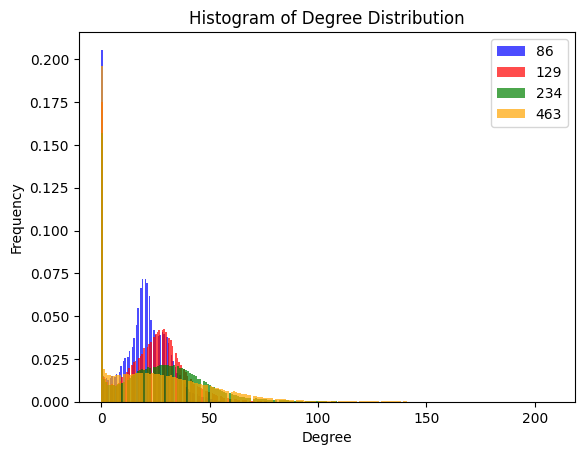

In [11]:
folder_names = [ "/content/gdrive/MyDrive/86","/content/gdrive/MyDrive/129", "/content/gdrive/MyDrive/234", "/content/gdrive/MyDrive/463"]


# Define the colors for each folder
colors = ['blue', 'red', 'green', 'orange']
marker_size = 5
alpha = 0.5

# Iterate over the folders
for folder_name, color in zip(folder_names, colors):
    folder_path = os.path.join("/path/to/main/folder", folder_name)
    

    # List all GraphML files in the current folder
    graphml_files = [file for file in os.listdir(folder_path) if file.endswith(".graphml")]

    # Initialize an empty list to store the degrees
    degrees = []

    # Iterate over the GraphML files in the folder
    for file_name in graphml_files:
        file_path = os.path.join(folder_path, file_name)

        # Load the GraphML file using NetworkX
        graph = nx.read_graphml(file_path)

        # Calculate the degree of each node
        degree_values = [graph.degree(node) for node in graph.nodes()]
        degrees.extend(degree_values)

    # Plot the histogram of the degree distribution for the current folder
    plt.hist(degrees, bins='auto', density=True, alpha=0.7, color=color, label=folder_name.split("/")[-1])

# Set the labels and title
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Histogram of Degree Distribution")

# Add a legend
plt.legend()

# Show the plot
plt.show()

<ipython-input-20-a0bfb28000da>:34: RuntimeWarning: divide by zero encountered in log
  log_degrees = np.log(nonzero_degrees)


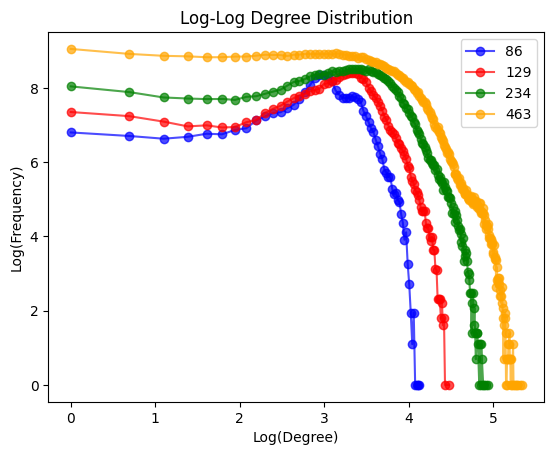

In [20]:


# List of folder names
folder_names = [ "/content/gdrive/MyDrive/86", "/content/gdrive/MyDrive/129", "/content/gdrive/MyDrive/234", "/content/gdrive/MyDrive/463"]

# Define the colors for each folder
colors = ['blue', 'red', 'green', 'orange']

# Iterate over the folders
for folder_name, color in zip(folder_names, colors):
    folder_path = os.path.join("/path/to/main/folder", folder_name)

    # List all GraphML files in the current folder
    graphml_files = [file for file in os.listdir(folder_path) if file.endswith(".graphml")]

    # Initialize an empty list to store the degrees
    degrees = []

    # Iterate over the GraphML files in the folder
    for file_name in graphml_files:
        file_path = os.path.join(folder_path, file_name)

        # Load the GraphML file using NetworkX
        graph = nx.read_graphml(file_path)

        # Calculate the degree of each node
        degree_values = [graph.degree(node) for node in graph.nodes()]
        degrees.extend(degree_values)

    # Plot the histogram of the degree distribution for the current folder
    # plt.hist(degrees, bins='auto', density=True, alpha=0.7, color=color, label=folder_name.split("/")[-1])

    # Calculate the log-log plot
    degree_counts = np.bincount(degrees)
    nonzero_degrees = np.nonzero(degree_counts)[0]
    log_degrees = np.log(nonzero_degrees)
    log_counts = np.log(degree_counts[nonzero_degrees])

    # Plot the log-log plot
    plt.plot(log_degrees, log_counts, 'o-', color=color, alpha=0.7, label=folder_name.split("/")[-1])

# Set the labels and title
plt.xlabel("Log(Degree)")
plt.ylabel("Log(Frequency)")
plt.title("Log-Log Degree Distribution")

# Add a legend
plt.legend()

# Show the plot
plt.show()


# **Assortativity**

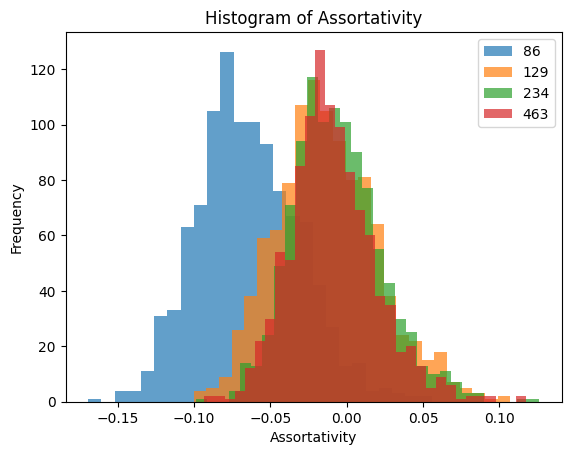

In [17]:
import os
import networkx as nx
import matplotlib.pyplot as plt

# List of folder names
folder_names = ["/content/gdrive/MyDrive/86", "/content/gdrive/MyDrive/129", "/content/gdrive/MyDrive/234", "/content/gdrive/MyDrive/463"]

# Iterate over the folders
for folder_name in folder_names:
    folder_path = os.path.join("/path/to/main/folder", folder_name)

    # List all GraphML files in the current folder
    graphml_files = [file for file in os.listdir(folder_path) if file.endswith(".graphml")]

    assortativity_values = []

    # Iterate over the GraphML files in the folder
    for file_name in graphml_files:
        file_path = os.path.join(folder_path, file_name)

        # Load the GraphML file using NetworkX
        graph = nx.read_graphml(file_path)

        # Calculate assortativity
        assortativity = nx.degree_assortativity_coefficient(graph)
        assortativity_values.append(assortativity)

    # Plot the histogram of assortativity for the current folder
    plt.hist(assortativity_values, bins='auto', alpha=0.7, label=folder_name.split("/")[-1])

# Set the labels and title
plt.xlabel("Assortativity")
plt.ylabel("Frequency")
plt.title("Histogram of Assortativity")

# Add a legend
plt.legend()

# Show the plot
plt.show()


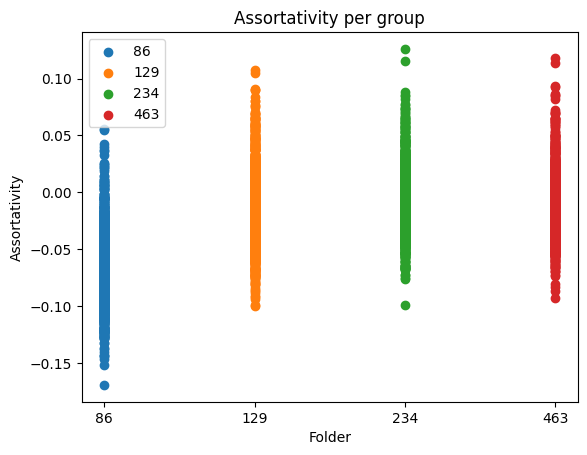

In [19]:


# List of folder names
folder_names = ["/content/gdrive/MyDrive/86", "/content/gdrive/MyDrive/129", "/content/gdrive/MyDrive/234", "/content/gdrive/MyDrive/463"]

# Iterate over the folders
for folder_name in folder_names:
    folder_path = os.path.join("/path/to/main/folder", folder_name)

    # List all GraphML files in the current folder
    graphml_files = [file for file in os.listdir(folder_path) if file.endswith(".graphml")]

    assortativity_values = []

    # Iterate over the GraphML files in the folder
    for file_name in graphml_files:
        file_path = os.path.join(folder_path, file_name)

        # Load the GraphML file using NetworkX
        graph = nx.read_graphml(file_path)

        # Calculate assortativity
        assortativity = nx.degree_assortativity_coefficient(graph)
        assortativity_values.append(assortativity)

    # Plot the scatter plot of assortativity for the current folder
    plt.scatter([folder_name.split("/")[-1]] * len(assortativity_values), assortativity_values, label=folder_name.split("/")[-1])

# Set the labels and title
plt.xlabel("Folder")
plt.ylabel("Assortativity")
plt.title("Assortativity per group")

# Add a legend
plt.legend()

# Show the plot
plt.show()


# **Min and Max Degree**

In [15]:

# List of folder names
folder_names = [ "/content/gdrive/MyDrive/86", "/content/gdrive/MyDrive/129", "/content/gdrive/MyDrive/234", "/content/gdrive/MyDrive/463"]
colors = ['blue', 'red', 'green', 'orange']
# Iterate over the folders
for folder_name in folder_names:
    folder_path = os.path.join("/path/to/main/folder", folder_name)

    # List all GraphML files in the current folder
    graphml_files = [file for file in os.listdir(folder_path) if file.endswith(".graphml")]

    min_degree = float('inf')  # Initialize with a high value
    max_degree = 0  # Initialize with a low value

    # Iterate over the GraphML files in the folder
    for file_name in graphml_files:
        file_path = os.path.join(folder_path, file_name)

        # Load the GraphML file using NetworkX
        graph = nx.read_graphml(file_path)

        # Calculate the degree of each node
        degree_values = [graph.degree(node) for node in graph.nodes()]

        # Update min and max degree values for the current file
        min_degree = min(min_degree, min(degree_values))
        max_degree = max(max_degree, max(degree_values))

    # Print the min and max degree values for the current folder
    print(f"Folder: {folder_name}")
    print("Minimum degree:", min_degree)
    print("Maximum degree:", max_degree)
    print()


Folder: /content/gdrive/MyDrive/86
Minimum degree: 0
Maximum degree: 62

Folder: /content/gdrive/MyDrive/129
Minimum degree: 0
Maximum degree: 88

Folder: /content/gdrive/MyDrive/234
Minimum degree: 0
Maximum degree: 140

Folder: /content/gdrive/MyDrive/463
Minimum degree: 0
Maximum degree: 208

